In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1352,ham,Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur S...,NaN,NaN,NaN
1237,ham,Is ur paper in e morn or aft tmr?,NaN,NaN,NaN
4891,ham,Miserable. They don't tell u that the side eff...,NaN,NaN,NaN
1059,spam,EASTENDERS TV Quiz. What FLOWER does DOT compa...,NaN,NaN,NaN
1330,ham,"Aight no rush, I'll ask jay",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.size


27860

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 1. Data Cleaning

In [9]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [13]:
df.sample(5)

,target,text
397,ham,You are always putting your business out there...
3458,spam,Not heard from U4 a while. Call me now am here...
3480,ham,Wherre's my boytoy ? :-(
2744,ham,"Tick, tick, tick ... Babe"
4061,ham,Hi dear we saw dear. We both are happy. Where ...


In [14]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.sample(3)

,target,text
5280,ham,"Vikky, come around &lt;TIME&gt; .."
4489,ham,My computer just fried the only essential part...
3025,ham,I finished my lunch already. U wake up already?


In [19]:
# final dataset format
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [20]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

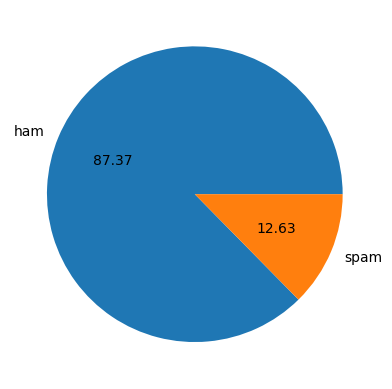

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
# Data is unbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [27]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
# counting the number of alphabets

In [29]:
df['num_characters'] =  df['text'].apply(len)

C:\Users\hario\AppData\Local\Temp\ipykernel_16812\3050218660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] =  df['text'].apply(len)


In [30]:
df

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [31]:
# num of words

In [32]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\hario\AppData\Local\Temp\ipykernel_16812\3620582556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [33]:
df

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35
5568,ham,Will Ì_ b going to esplanade fr home?,37,9
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15
5570,ham,The guy did some bitching but I acted like i'd...,125,27


In [34]:
import nltk

In [35]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [36]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\hario\AppData\Local\Temp\ipykernel_16812\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [37]:
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [39]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\hario\AppData\Local\Temp\ipykernel_16812\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
df

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [42]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
# ham messages
# 0 is denoting the legal or verified messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [45]:
# spam messages
# 1 is denoting the illegal or suspicious messages.
df[df['target']==1][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

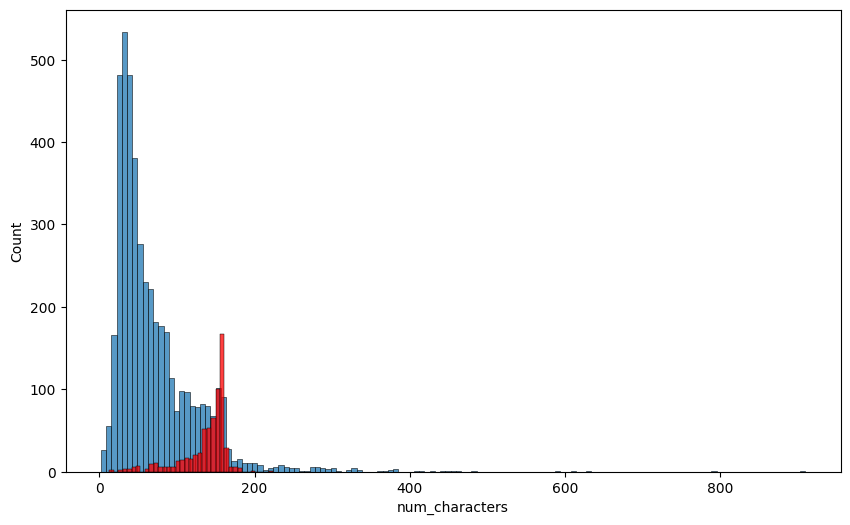

In [47]:
plt.figure(figsize= (10,6))
sns.histplot(df[df['target']=='ham']['num_characters'])
sns.histplot(df[df['target']=='spam']['num_characters'],color='red')

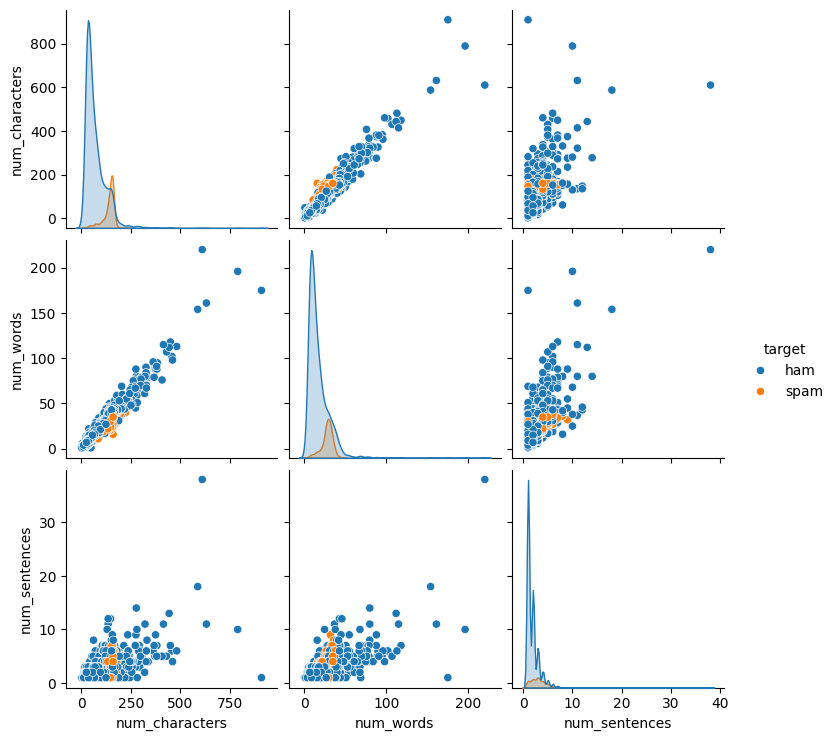

In [48]:
sns.pairplot(df,hue='target')

In [49]:
df_copy = df

In [50]:
type(df['target'])

pandas.core.series.Series

In [51]:
df.sample(40)


,target,text,num_characters,num_words,num_sentences
5413,ham,Nite nite pocay wocay luv u more than n e thin...,81,17,1
1882,ham,"Sorry, I can't help you on this.",32,10,1
217,ham,Easy ah?sen got selected means its good..,41,10,1
1004,ham,Umma. Did she say anything,26,6,2
3692,ham,I was about to do it when i texted. I finished...,90,21,2
4458,spam,Welcome to UK-mobile-date this msg is FREE giv...,151,30,3
5399,ham,And he's apparently bffs with carly quick now,45,9,1
5153,ham,Haven't left yet so probably gonna be here til...,53,12,1
1316,ham,Why nothing. Ok anyway give me treat,36,8,2
1835,ham,* Will be september by then!,28,7,1


<Axes: >

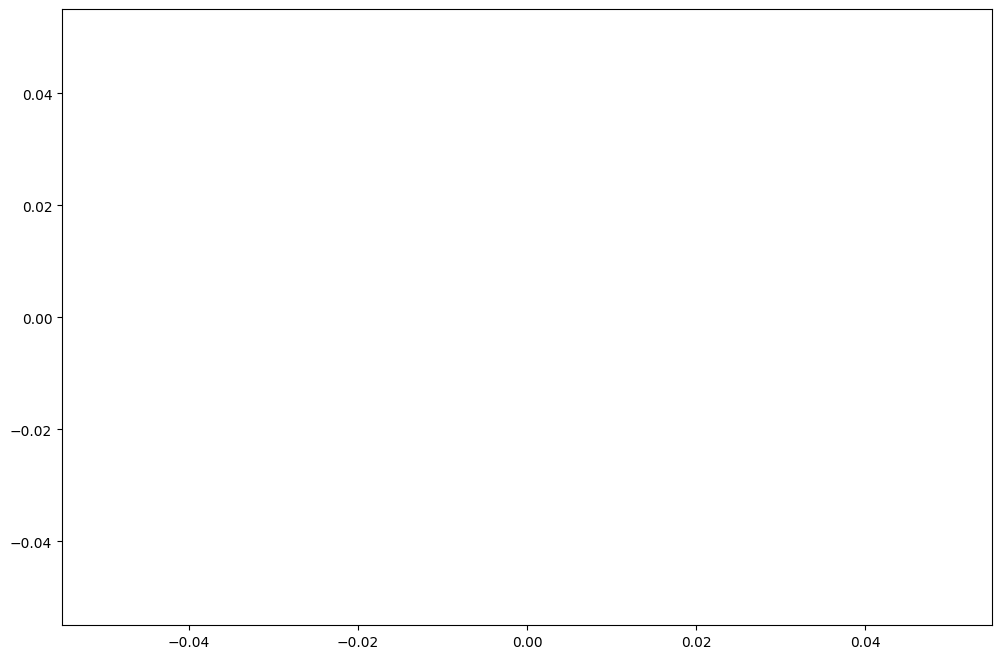

In [52]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'])


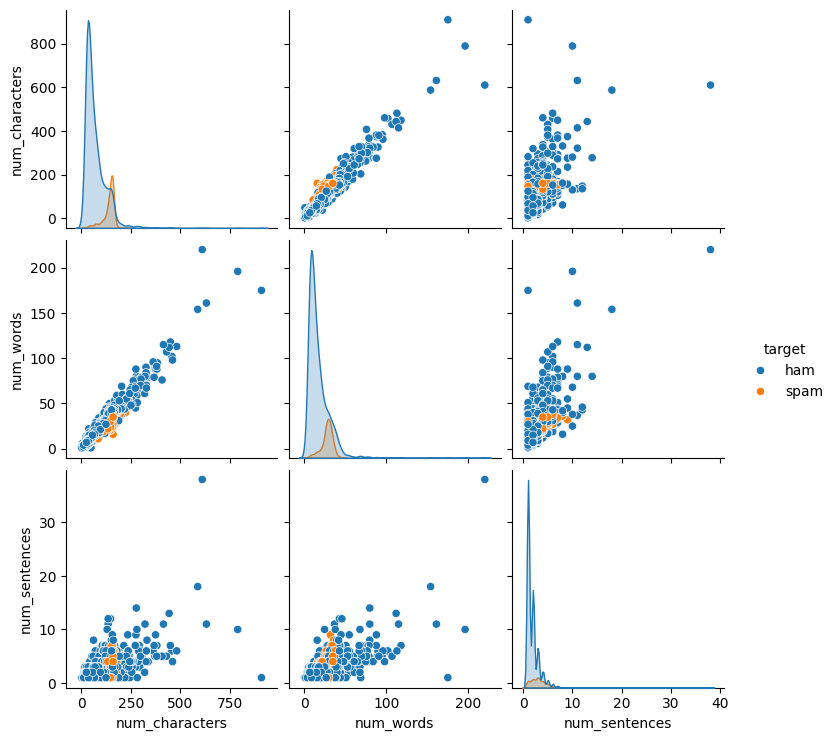

In [53]:
sns.pairplot(df,hue='target')

In [54]:
df.dtypes

target            object
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

In [55]:
numeric_df = df.select_dtypes(include=['number'])

<Axes: >

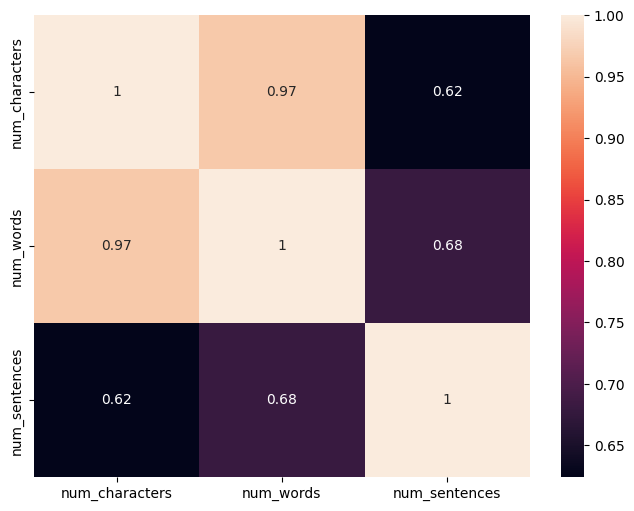

In [56]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)

# 3. Data Preprocessing

1. lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [57]:
import nltk

In [58]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [59]:
def transform_text(text):
    text = text.lower() #lowercasing
    text = nltk.word_tokenize(text) #tokenization
    y = []
    # removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] #cloning
    y.clear()
    
    # removing punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        # stemming of words like playing->play
        y.append(ps.stem(i))

    
    return " ".join(y)

In [62]:
transform_text("hello I am Hariom Singh Thakur and I am 20 years old having $10000 in my @axis bank.")

'hello hariom singh thakur 20 year old 10000 axi bank'

In [ ]:
print(stopwords.words('english'))

In [61]:
import string

In [63]:
print(string.punctuation)
print(ps.stem("playing"))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
play


In [64]:
transform_text(sample)

NameError: name 'sample' is not defined

In [65]:
sample = df['text'][101]

In [66]:
sample

"I'm still looking for a car to buy. And have not gone 4the driving test yet."

In [67]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences
1910,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,108,30,1
2662,spam,Hello darling how are you today? I would love ...,130,32,2
1608,ham,Are your freezing ? Are you home yet ? Will yo...,152,37,6
2006,ham,Shopping lor. Them raining mah hard 2 leave or...,52,11,2
514,spam,"You are guaranteed the latest Nokia Phone, a 4...",148,30,3
1753,ham,Jus came back fr lunch wif my sis only. U leh?,46,13,2
5447,ham,So that takes away some money worries,37,7,1
2272,ham,"Haha awesome, I've been to 4u a couple times. ...",63,17,2
265,ham,Same. Wana plan a trip sometme then,35,8,2
2325,ham,Apps class varaya elaya.,24,5,1


In [79]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\hario\AppData\Local\Temp\ipykernel_16812\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [80]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
975,0,Hey no I ad a crap nite was borin without ya 2...,118,29,2,hey ad crap nite borin without ya 2 boggi u bo...
2456,0,Onum ela pa. Normal than.,25,6,1,onum ela normal
4561,0,How much u trying to get?,25,7,1,much u tri get
689,1,<Forwarded from 448712404000>Please CALL 08712...,111,19,1,forward 448712404000 pleas call 08712404000 im...
3590,0,How much would it cost to hire a hitman,39,9,1,much would cost hire hitman
3914,0,Ard 530 lor. I ok then message Ì_ lor.,38,11,2,ard 530 lor ok messag lor
2548,0,Honestly i've just made a lovely cup of tea an...,122,26,1,honestli made love cup tea promptli drop key b...
5142,0,Now that you have started dont stop. Just pray...,133,29,2,start dont stop pray good idea anyth see help ...
5571,0,Rofl. Its true to its name,26,7,2,rofl true name
5448,0,"aight we can pick some up, you open before ton...",51,12,1,aight pick open tonight


In [71]:
from wordcloud import WordCloud # using wordcloud to display the grop of spam messages in visual format

In [72]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [73]:
df['target'] = df['target'].replace({'ham': 0, 'spam': 1})


C:\Users\hario\AppData\Local\Temp\ipykernel_16812\647980047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'ham': 0, 'spam': 1})
C:\Users\hario\AppData\Local\Temp\ipykernel_16812\647980047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace({'ham': 0, 'spam': 1})


In [81]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [95]:
# defining spam wordcloud
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

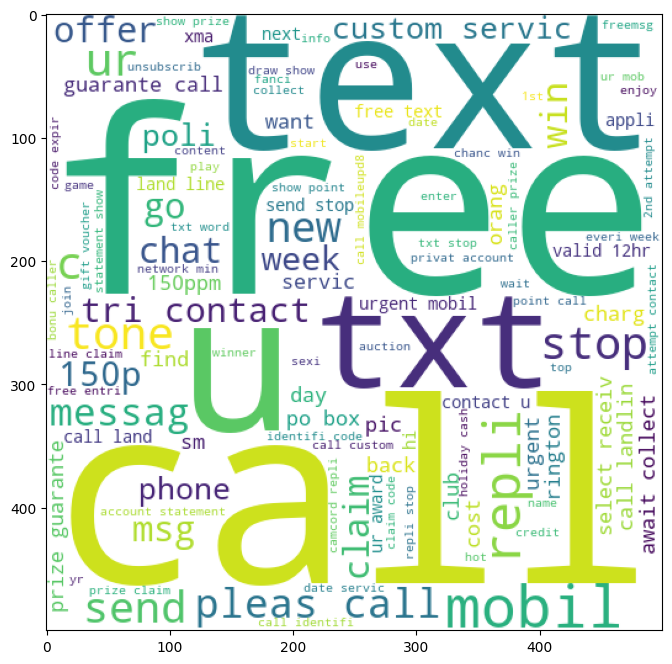

In [96]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)

In [89]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():  # extracting the spammed words and then making a list 
    for word in msg.split():
        spam_corpus.append(word)

In [90]:
len(spam_corpus)

9939

In [94]:
from collections import Counter
Counter(spam_corpus).most_common(30) # finding & counting the most used words in the spam messages 

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [109]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [126]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(position='vertical')
plt.show()

ValueError: could not convert string to float: 'e'

<Figure size 640x480 with 1 Axes>

In [129]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():  # extracting the spammed words and then making a list 
    for word in msg.split():
        ham_corpus.append(word)

In [130]:
len(ham_corpus)

35404

In [131]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [132]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# 4. Model Building